使用python完成以下可视化操作，数据存于players.csv当中
文件格式如下：
"nflId","height","weight","birthDate","collegeName","position","displayName"
25511,"6-4",225,"1977-08-03","Michigan","QB","Tom Brady"
29550,"6-4",328,"1982-01-22","Arkansas","T","Jason Peters"
29851,"6-2",225,"1983-12-02","California","QB","Aaron Rodgers"
30842,"6-6",267,"1984-05-19","UCLA","TE","Marcedes Lewis"
身高和体重的分布： 可以绘制身高和体重的直方图，以了解球员身体特征的分布情况。

不同大学的球员数量： 可以使用饼图展示来自不同大学的球员数量，以显示哪些大学产出了更多的NFL球员，低于%1的学校合并为其他类。

不同位置的球员数量： 可以展示不同位置（QB、T、TE、WR等）球员的数量分布，看哪些位置的球员数量最多。

年龄分布： 可以根据出生日期计算球员的年龄，并绘制年龄分布的直方图。

位置与身高/体重的关系： 可以使用散点图展示不同位置球员的身高和体重分布情况，以了解不同位置球员身体特征的差异。

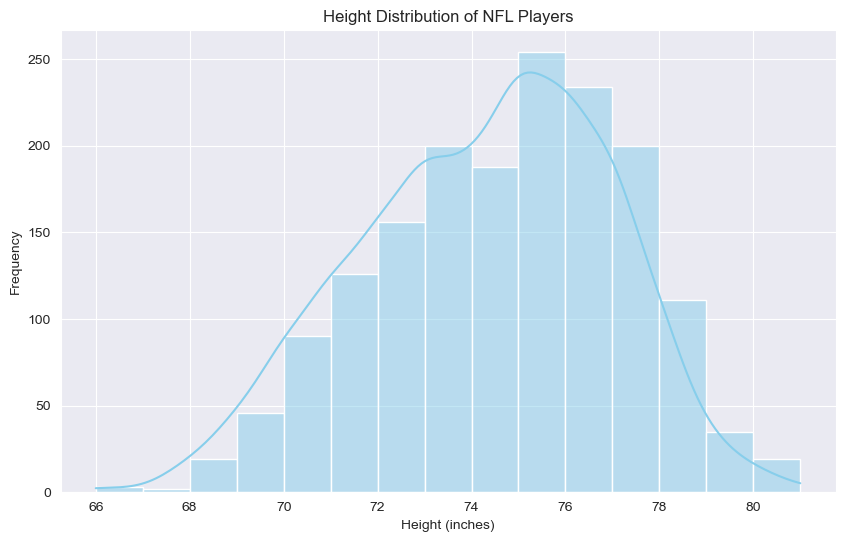

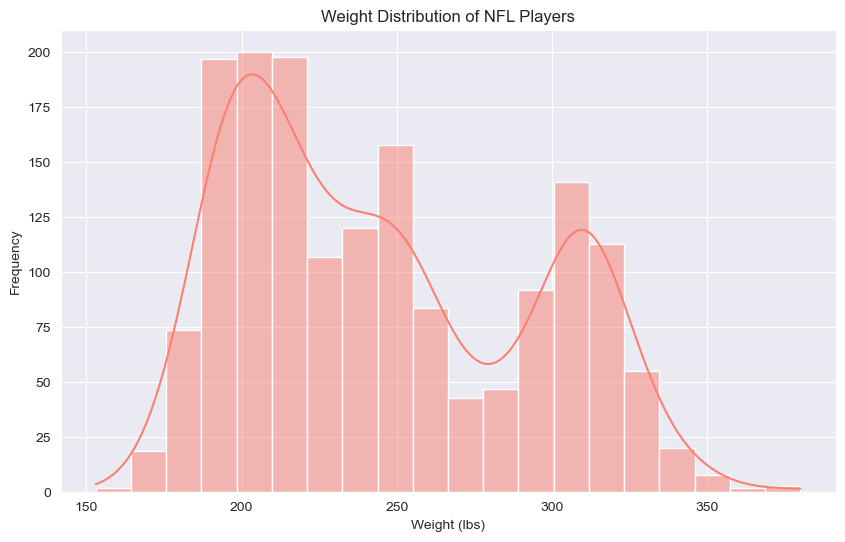

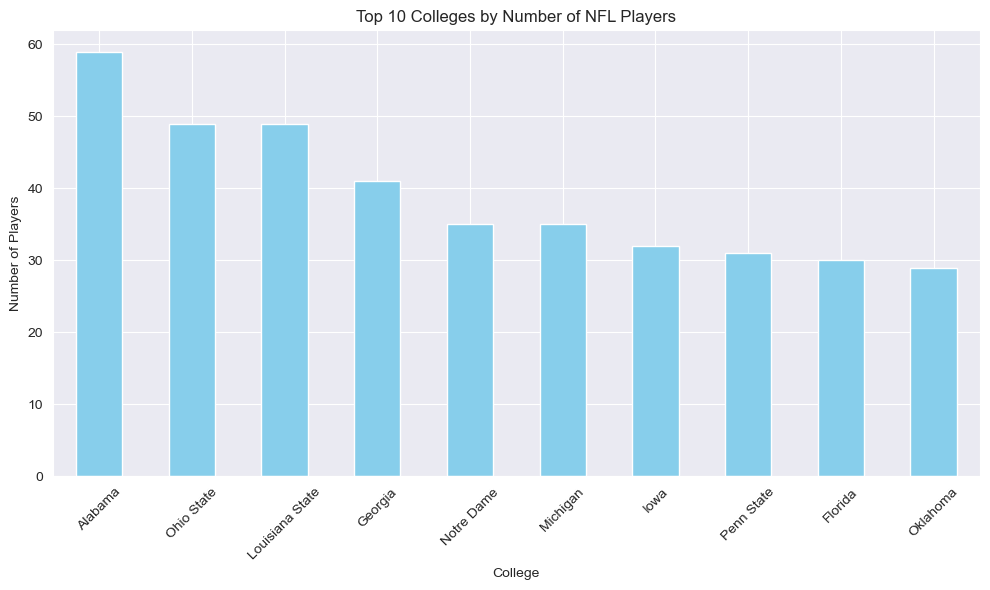

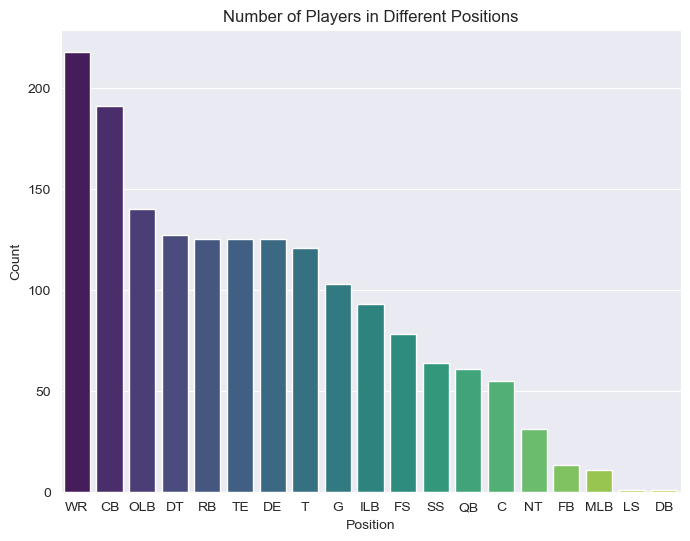

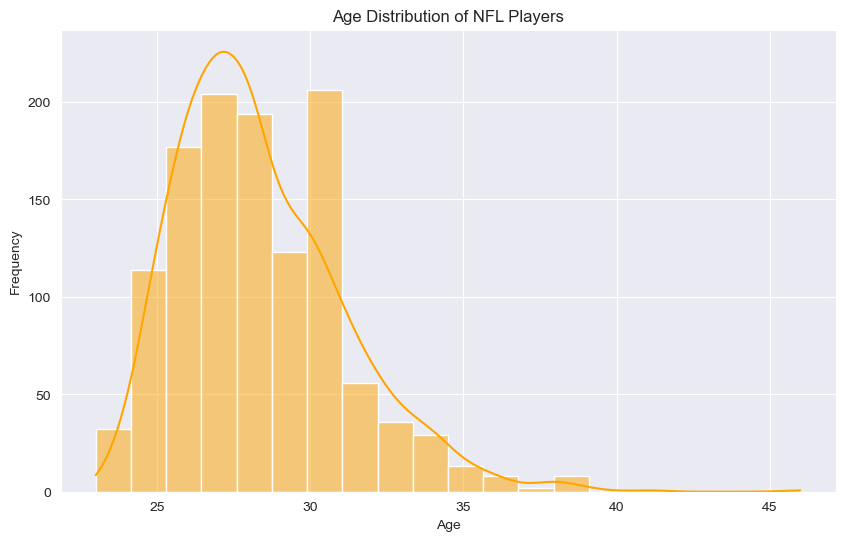

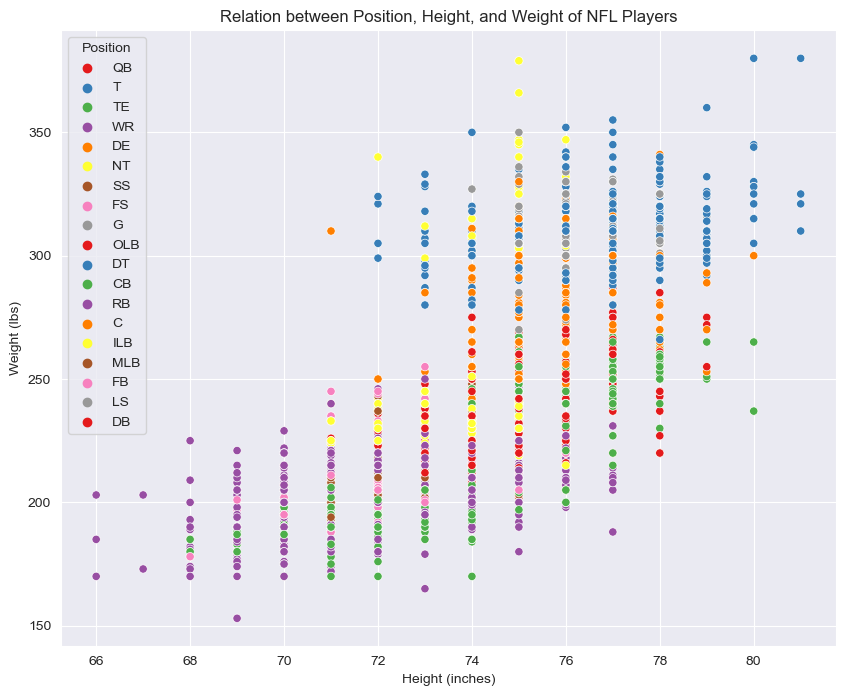

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# 路径
path = 'C:/NFL/Dataset'
data_path = os.path.join(path, 'players.csv')
# 读取 CSV 文件
data = pd.read_csv(data_path)

# 将身高转换为英寸
def height_to_inches(height):
    feet, inches = map(int, height.split('-'))
    return feet * 12 + inches

data['height_inches'] = data['height'].apply(height_to_inches)

# 身高和体重的直方图
plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='height_inches', binwidth=1, kde=True, color='skyblue')
plt.title('Height Distribution of NFL Players')
plt.xlabel('Height (inches)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='weight', bins=20, kde=True, color='salmon')
plt.title('Weight Distribution of NFL Players')
plt.xlabel('Weight (lbs)')
plt.ylabel('Frequency')
plt.show()

# 统计不同大学的球员数量并选取前十名
college_counts = data['collegeName'].value_counts().head(10)

# 绘制条形图显示前十大学的球员数量
plt.figure(figsize=(10, 6))
college_counts.plot(kind='bar', color='skyblue')
plt.title('Top 10 Colleges by Number of NFL Players')
plt.xlabel('College')
plt.ylabel('Number of Players')
plt.xticks(rotation=45)  # 旋转x轴标签，使其更易读
plt.tight_layout()
plt.show()

# 不同位置的球员数量
position_counts = data['position'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=position_counts.index, y=position_counts.values, palette='viridis')
plt.title('Number of Players in Different Positions')
plt.xlabel('Position')
plt.ylabel('Count')
plt.show()

# 年龄分布
from datetime import datetime

# 计算年龄
today = datetime.now()
data['birthDate'] = pd.to_datetime(data['birthDate'])
data['age'] = (today - data['birthDate']).astype('<m8[Y]')

plt.figure(figsize=(10, 6))
sns.histplot(data=data, x='age', bins=20, kde=True, color='orange')
plt.title('Age Distribution of NFL Players')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# 位置与身高/体重的关系的散点图
plt.figure(figsize=(10, 8))
sns.scatterplot(data=data, x='height_inches', y='weight', hue='position', palette='Set1')
plt.title('Relation between Position, Height, and Weight of NFL Players')
plt.xlabel('Height (inches)')
plt.ylabel('Weight (lbs)')
plt.legend(title='Position')
plt.show()
